# Visualising Loans Awarded by Kiva

This project visualises insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, this notebook will explore the average loan amount by country using aggregated bar charts. It will also visualise the distribution of loan amounts by project type and gender using box plots and violin plots.

## Step 1: Import Necessary Python Modules
Import the modules needed in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`
- `%config InlineBackend.figure_format` eliminates blurry plots

In [114]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

## Step 2: Ingest The Data
Load **kiva_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

In [115]:
df = pd.read_csv('kiva_data.csv')
df.head()

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female


## Step 3: Examine The Data

### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 


Print the first 25 rows of `df` using `.head()`

In [116]:
df.head(25)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


## Step 4: Bar Charts

Create a bar plot using Seaborn to visualise the average size of Kiva loans given to projects, by country.

Use `sns.barplot()` with the following arguments:

- `data` set to `df`
- `x` set to `country`
- `y` set to `loan_amount`

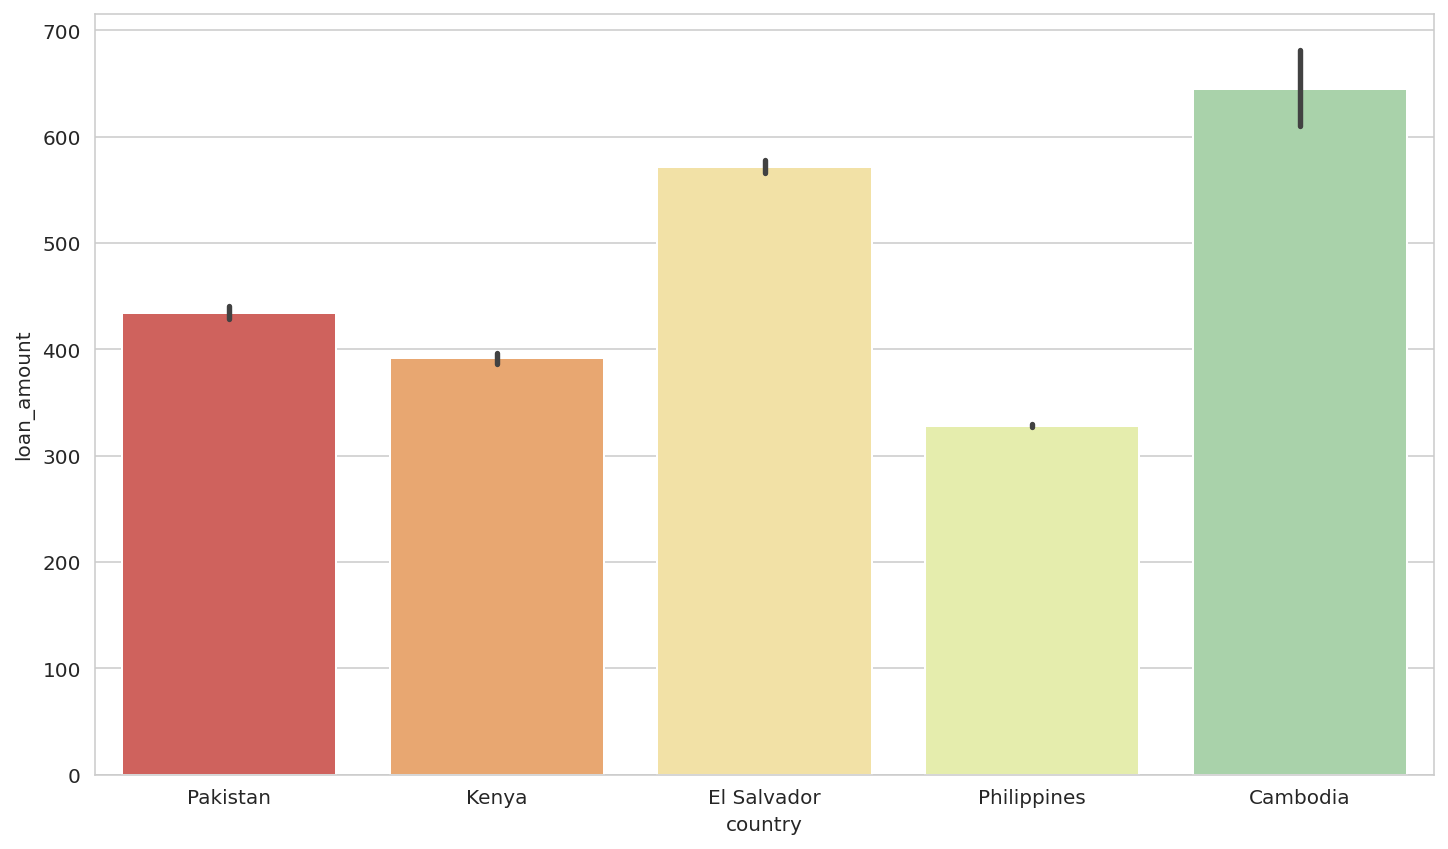

In [117]:
# Creates the figure, note
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data = df, x = 'country', y = 'loan_amount')

### Adding `$` units

Use the following code to so that the `loan_amount` ticks on the y-axis begin with a `$` (units of USD). 

```python
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
```

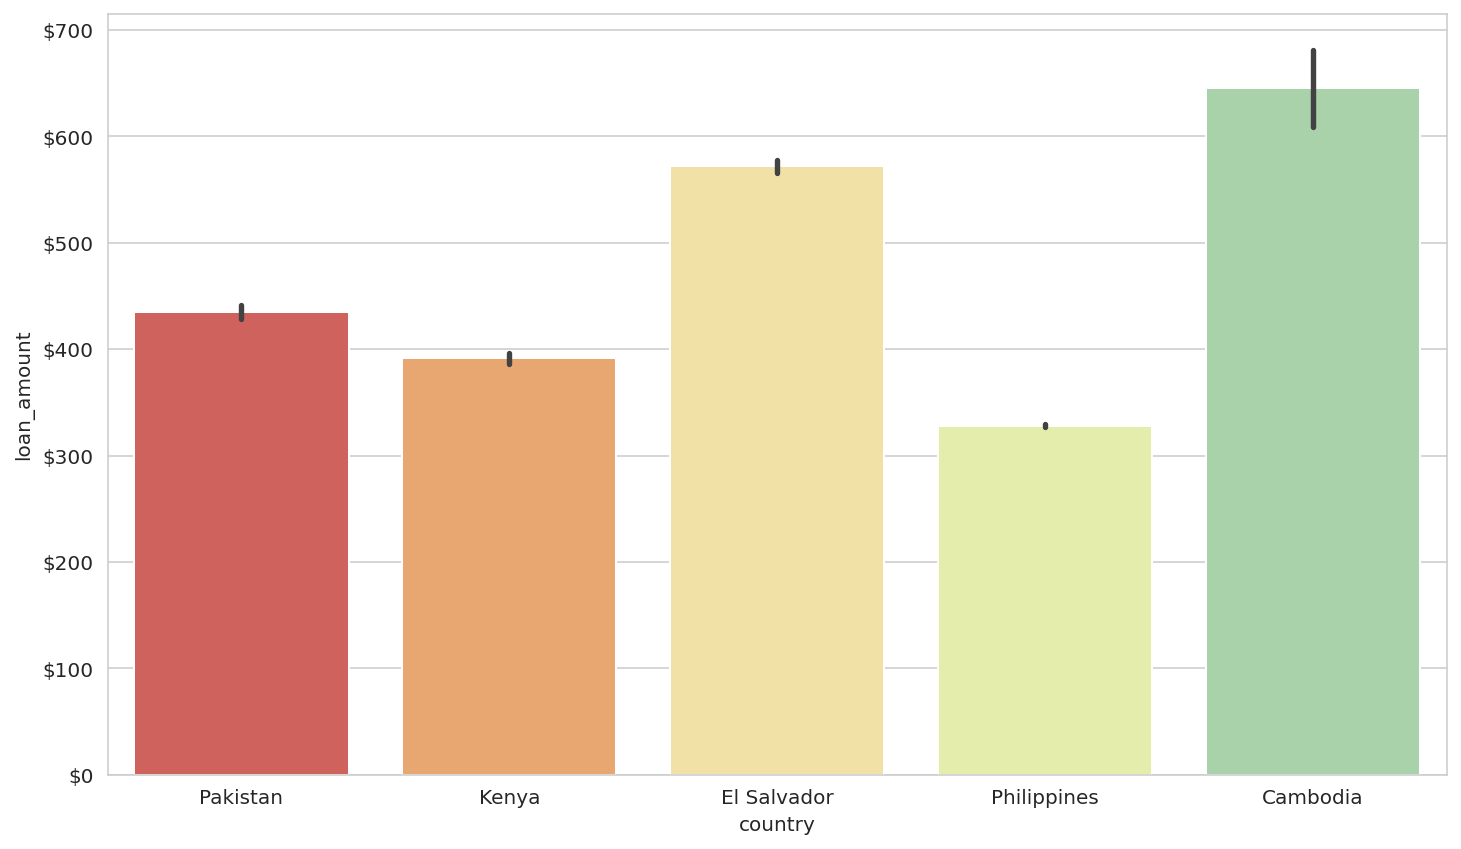

In [118]:
import matplotlib.ticker as mtick
# Creates the figure
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the data
sns.barplot(data=df, x="country", y = "loan_amount")

# Use part of the code above to format the y-axis ticks below this line
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

## Step 5: Using `hue` In The Visualisation

Breaking down the `loan_amount` by country, and nesting by `gender`.
<br>
<br>
Add the `hue` parameter to your `sns.barplot()` and set it so that the visualisation includes the nested category of gender.

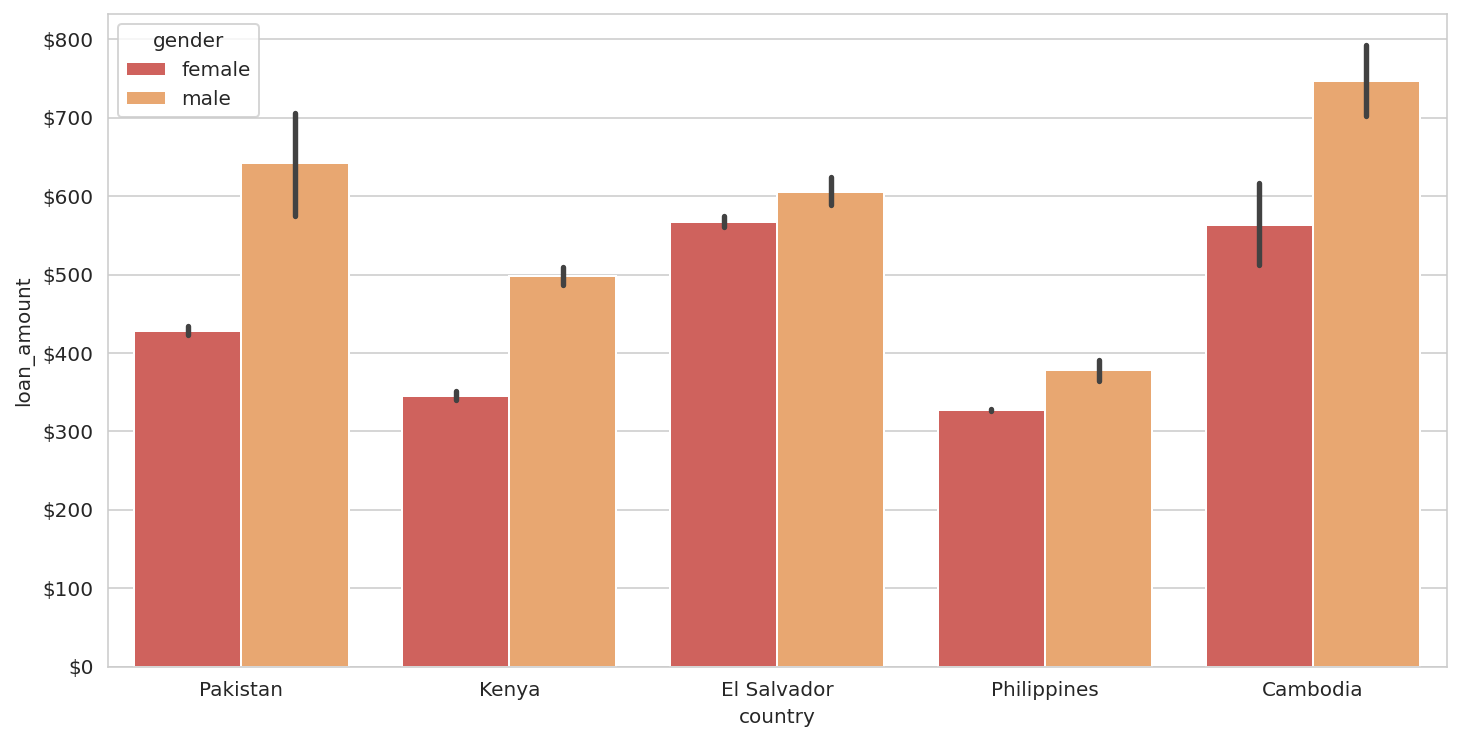

In [119]:
# Creates the figure
f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df, x="country", y="loan_amount", hue='gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#### Analysis Questions

On average, do female or male recipients receive larger loans from Kiva?

In [120]:
male_avg = df[df['gender'] == 'male']['loan_amount'].mean()
female_avg = df[df['gender'] == 'female']['loan_amount'].mean()
if male_avg > female_avg:
    print(f'Male recipients receive larger loans from Kiva with a mean of ${male_avg} per loan.')
else:
    print(f'Female recipients receive larger loans from Kiva with a mean of {female_avg}.')

Male recipients receive larger loans from Kiva with a mean of $496.2632531678304 per loan.


Which country has the *least* disparity in loan amounts awarded by gender?

In [121]:
# El Salvador appears to have least disparity

Based on the data, what kind of recommendations can you make to Kiva about the loans they give?

In [122]:
# Reduce gender loan gap

What actions could be taken to implement the recommendations you've made?

In [123]:
# Workshop to focus on women-led projects
# Enforce a specific amount to be allocated for female-led projects

## Step 6: Styling
Set a different colour palette using `sns.set_palette()` using one of the Color Brewer colour paletters.<br>
Set the plot background style using `sns.set_style()`.

<AxesSubplot:title={'center':'Average Loan Amount by Country, Gender'}, xlabel='country', ylabel='loan_amount'>

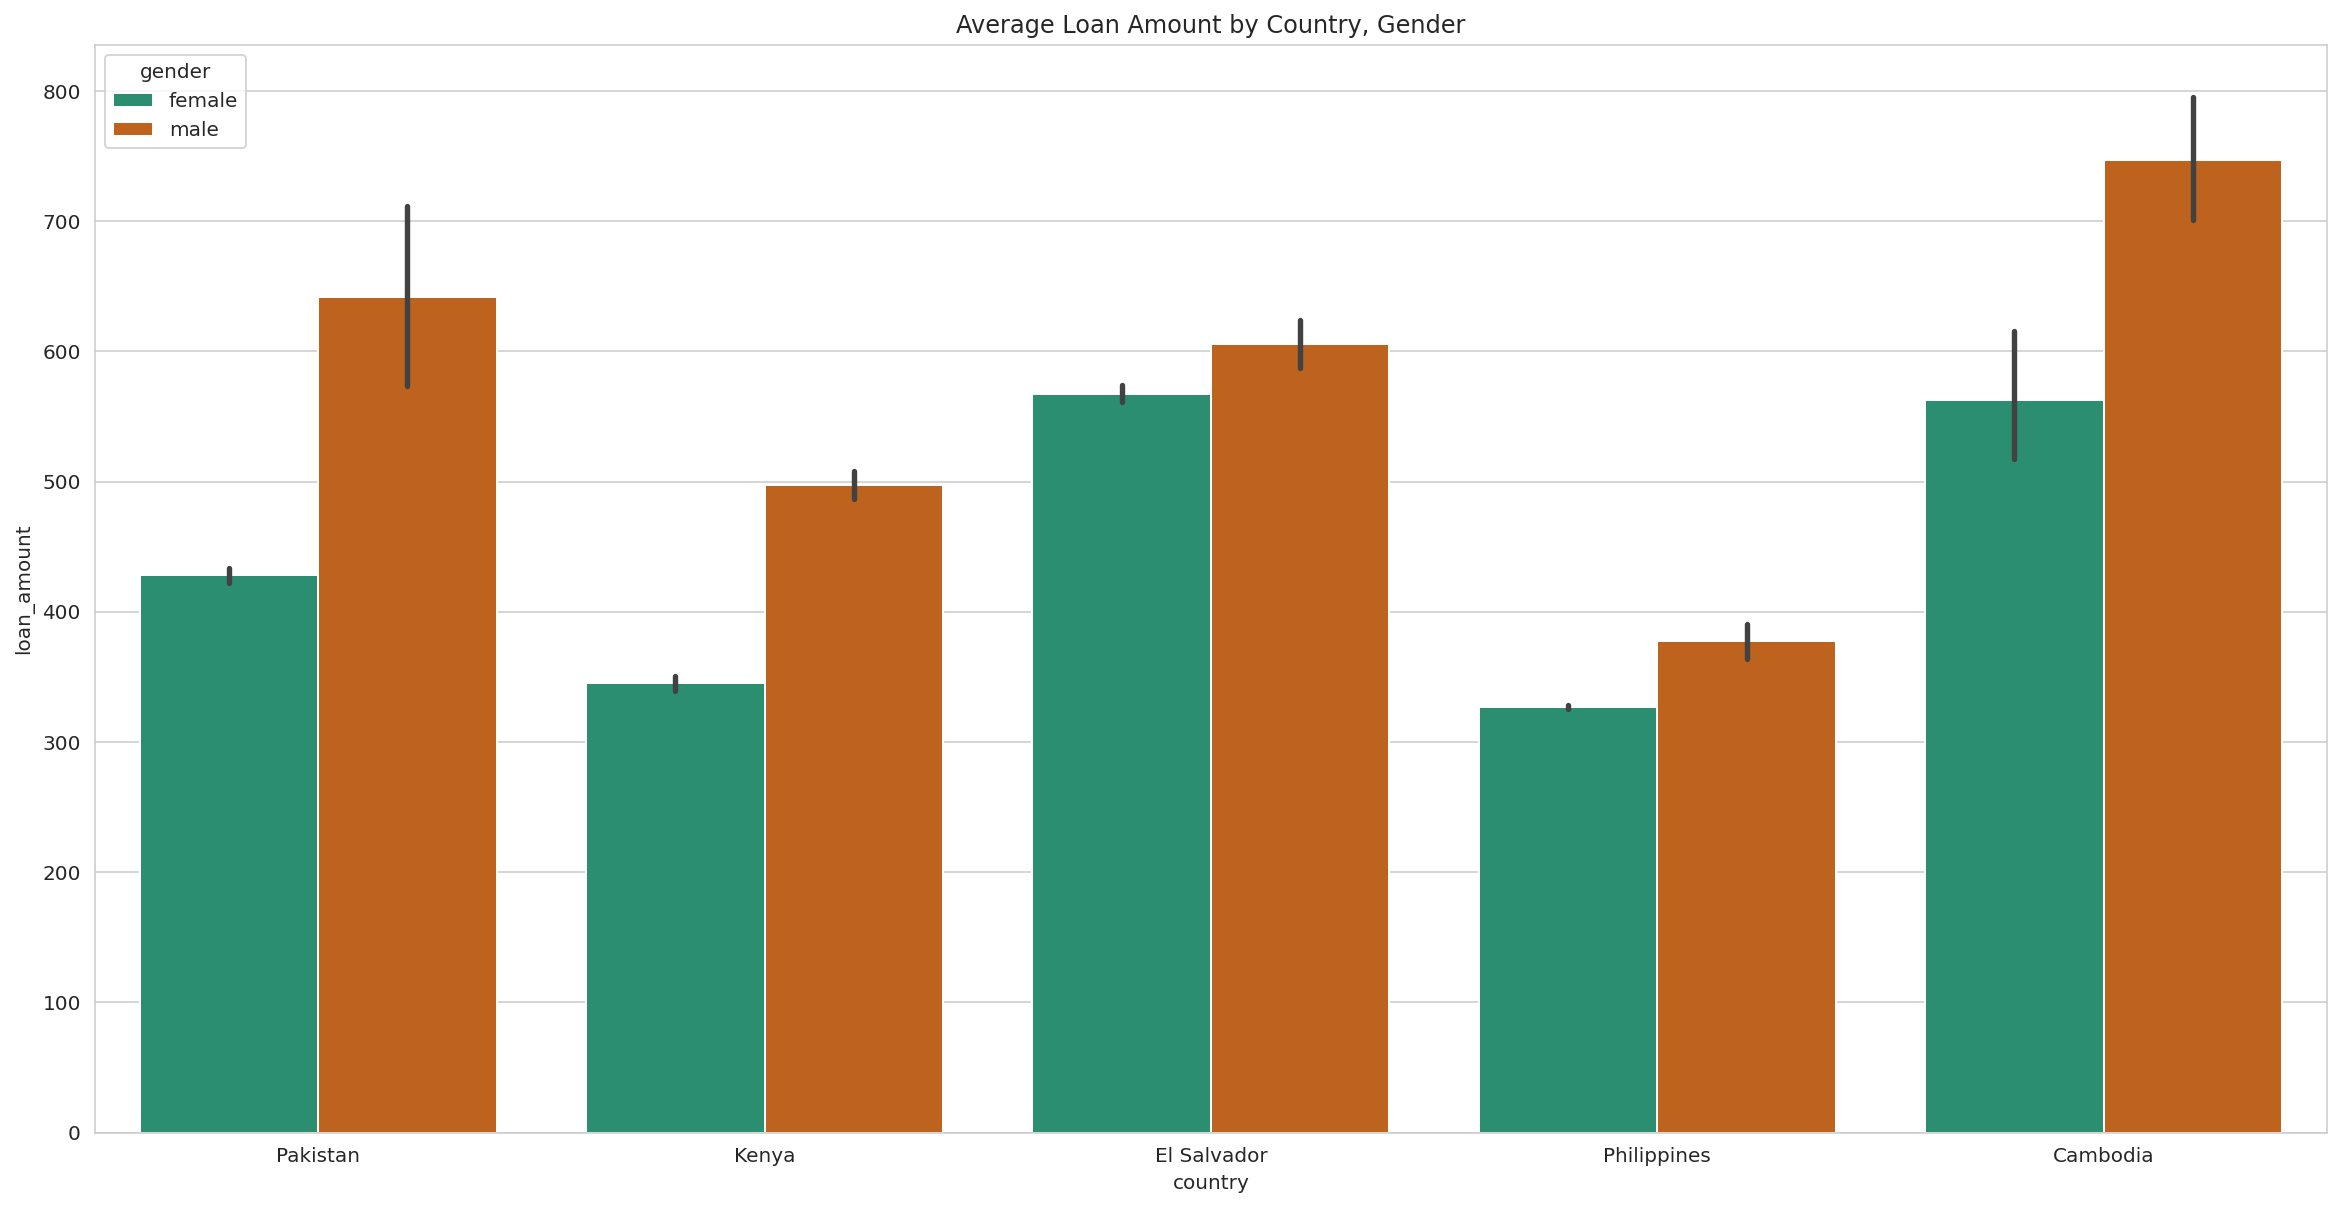

In [124]:
# Set color palette
sns.set_palette('Dark2')

# Set style
sns.set_style('whitegrid')

# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(20, 10))

# Add a title
plt.title('Average Loan Amount by Country, Gender')

# Use Seaborn to create the bar plot
sns.barplot(data = df, x = 'country', y = 'loan_amount', hue = 'gender')



## Step 7: Box Plots With Kiva Data

Make a box plot to compare the distribution of loans by country.

Use `sns.boxplot()` to compare the distribution of loan amounts by country for the Kiva dataset.   

`sns.boxplot()` can be passed the same parameters as `sns.barplot()`.


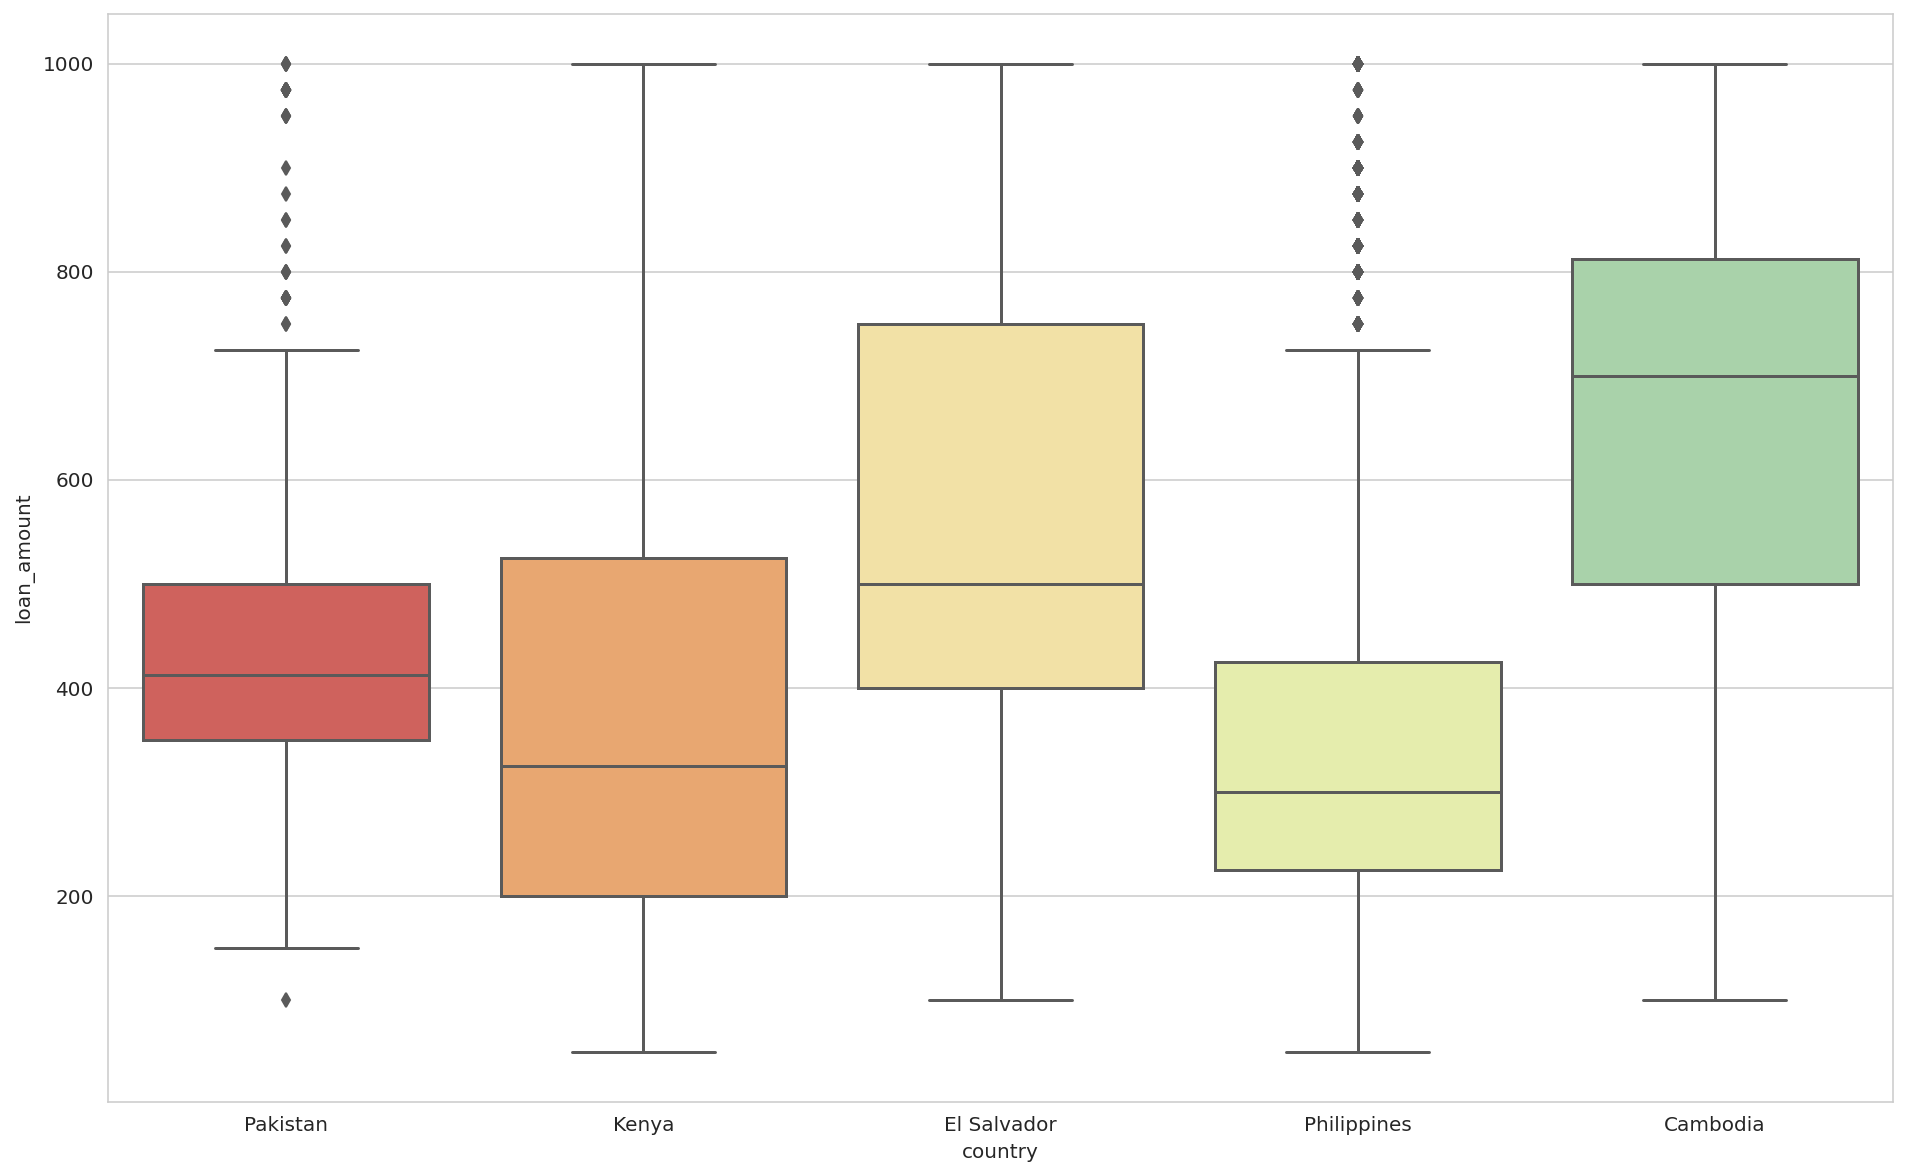

In [125]:
plt.figure(figsize=(16, 10))
sns.set_palette('Spectral')
sns.boxplot(data = df, x = 'country', y = 'loan_amount')
plt.show()

#### Analysis Questions

Which country's box has the widest distribution?

In [126]:
# Kenya

In which country would you be most likely to receive the largest loan amount?

In [127]:
# Cambodia

## Step 8: Box Plot by Activity

Instead of visualising the loan amount by *country*, use `sns.boxplot()` to plot the loan amount by *activity*.

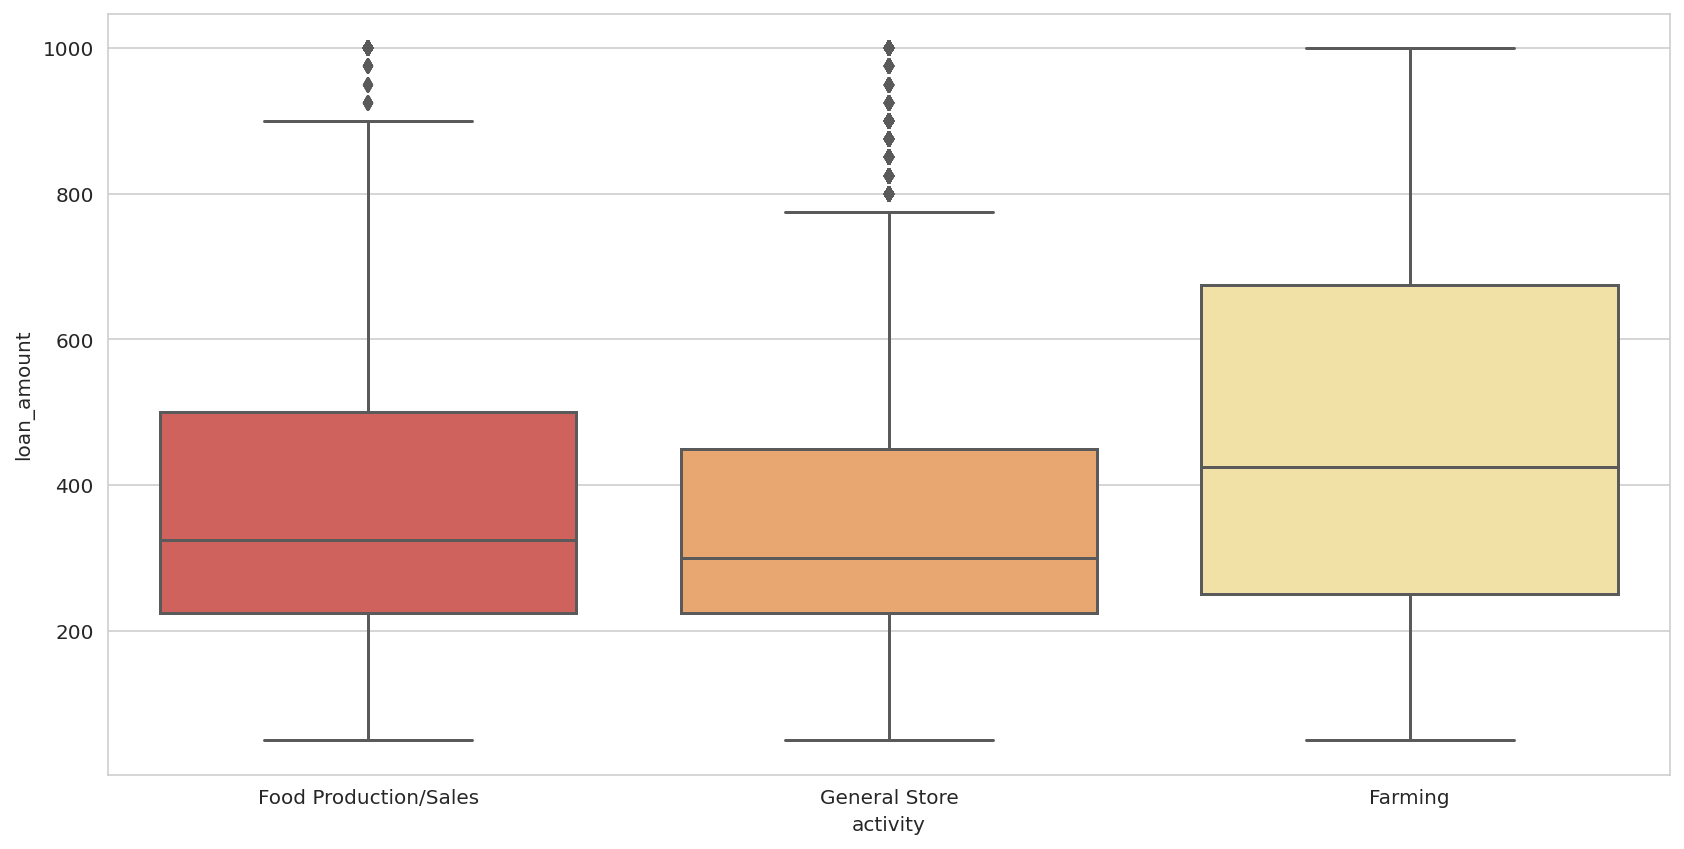

In [128]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='activity', y='loan_amount')
plt.show()

#### Analysis Questions

What does this visualisation reveal that previous ones did not?

In [129]:
# The distribution of activities receiving loans
# Farming is the activity most likely to receive the largest loans

## Step 9: Violin Plots

You can use nearly identical syntax (as you have used for box plots) to create violin plots. Take this line of code from above:

```python
sns.boxplot(data=df, x="activity", y="loan_amount")
```

To visualise the distribution of the exact same data as a violin plot you could pass the same parameters to `sns.violinplot()` instead of `sns.boxplot()`.

<AxesSubplot:xlabel='activity', ylabel='loan_amount'>

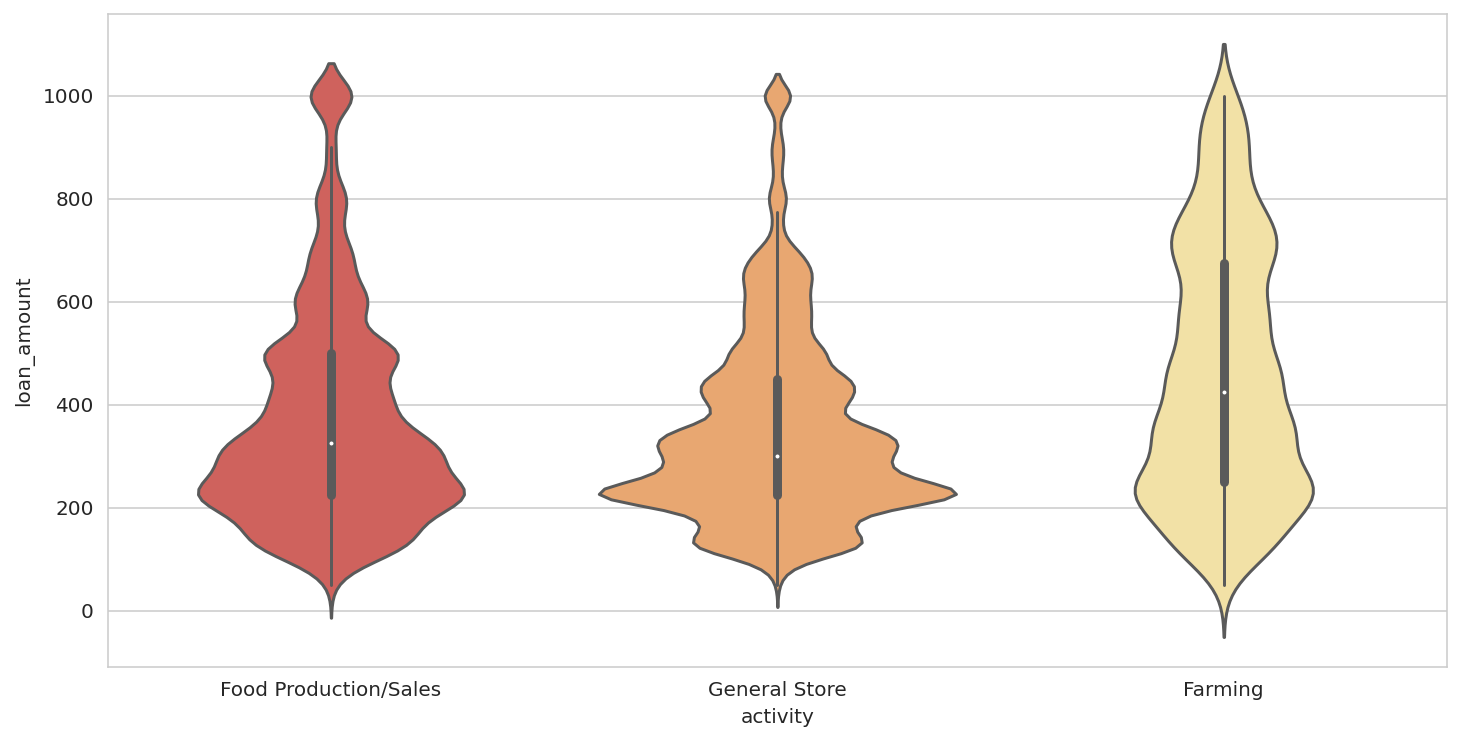

In [130]:
plt.figure(figsize=(12, 6))

sns.violinplot(data=df, x="activity", y="loan_amount")

### Create a violin plot that visualises the distribution of loan amount by country.
Previously, we created a violin plot and plotted the data by _activity_. This time, create a violin plot that plots the data by _country_.

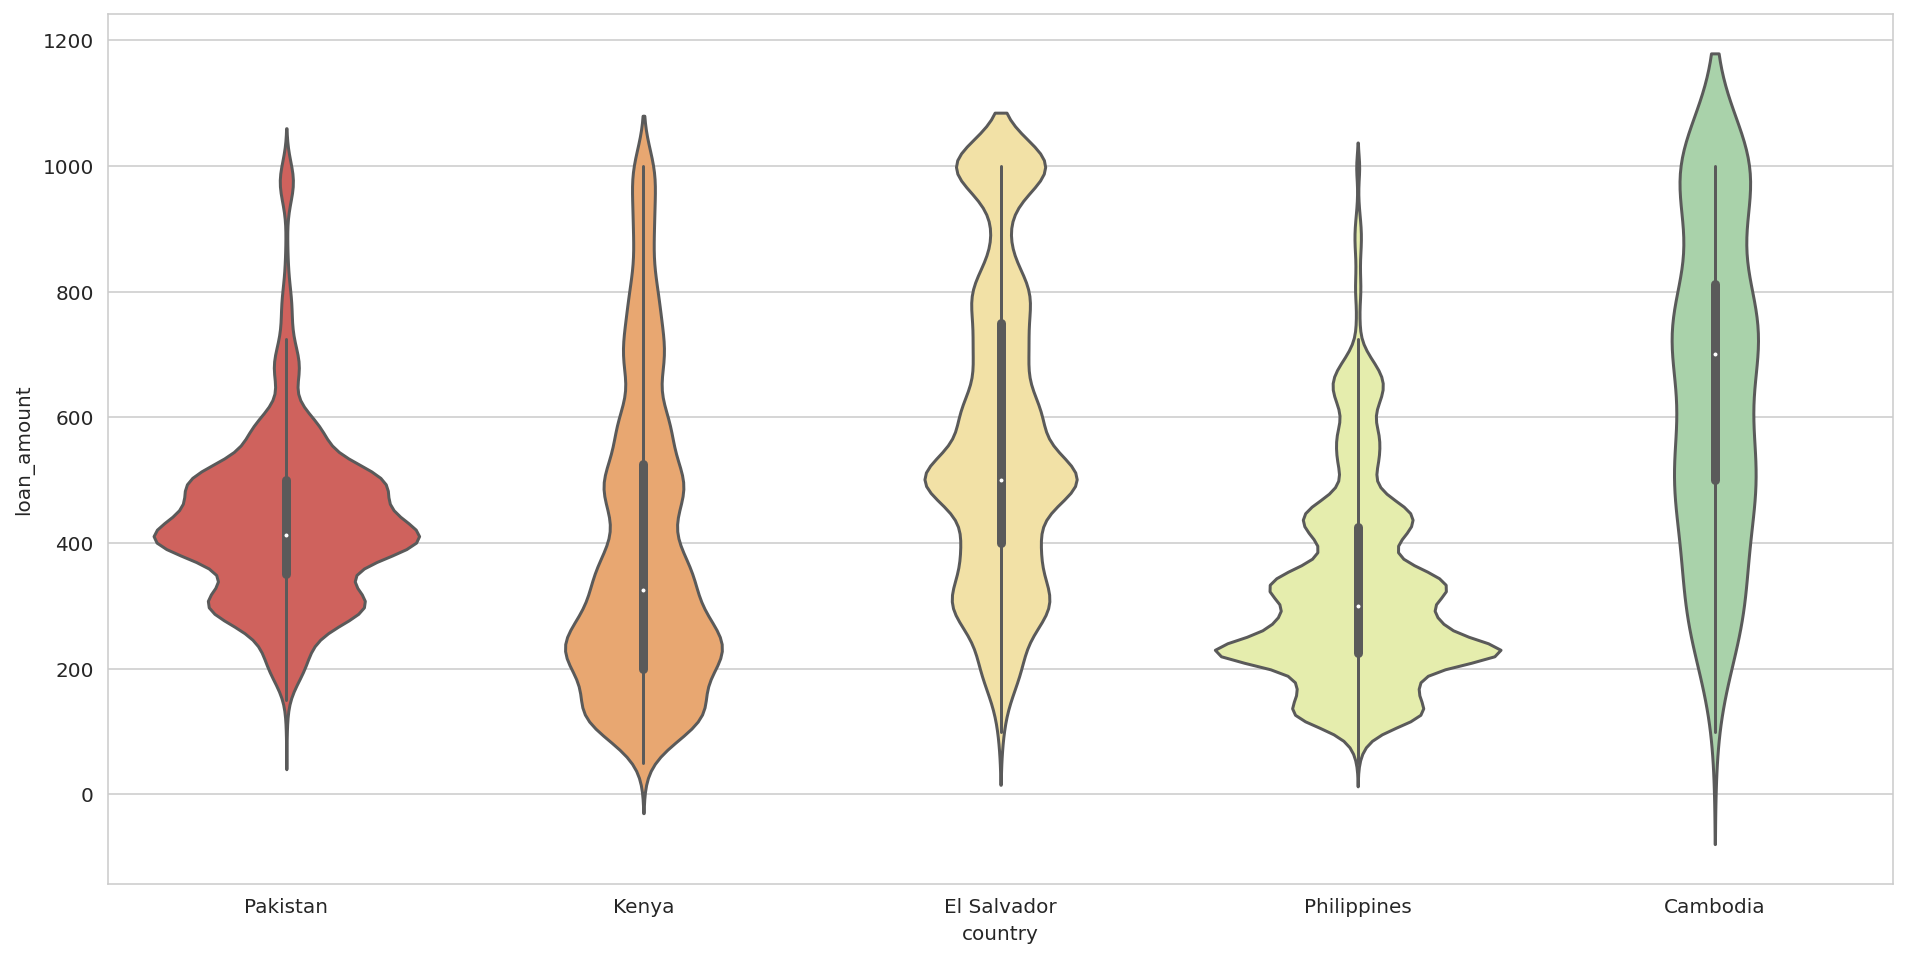

In [131]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=df, x='country', y='loan_amount')
plt.show()

## Step 10: Split Violin Plots

Use the `hue` and `split` parameters with `sns.violinplot()` to visualise the distribution of loan amount by country, split by gender. 

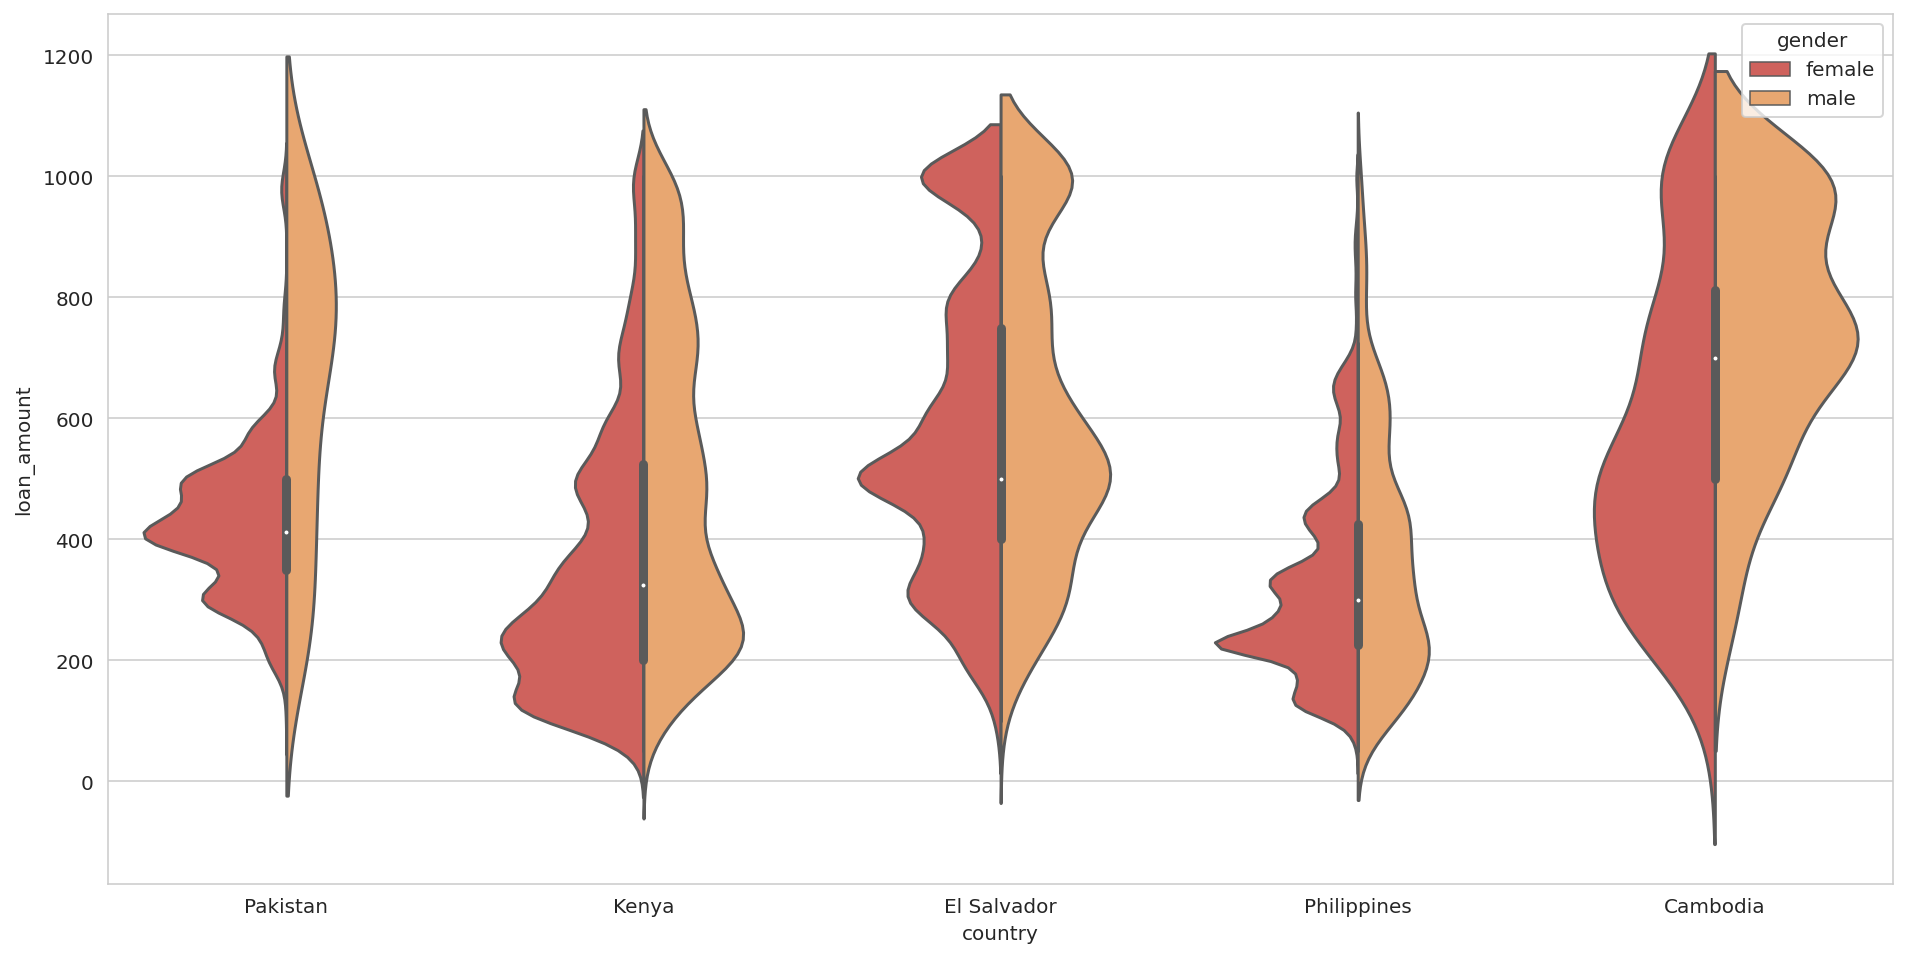

In [132]:
# Some styling
sns.set_palette("Spectral")
plt.figure(figsize=(16, 8))
sns.violinplot(data=df, x='country', y='loan_amount', hue='gender', split=True)
plt.show()

#### Analysis Questions

What does this visualisation reveal about the distribution of loan amounts within countries by gender?

In [133]:
# In Pakistan, the average loan amount received by women is below the average received by men
# Cambodia has a similar distribution
# El Salvador seems to have a fairly equal distribution of average loan amounts by gender
# Kenya follows a similar distribution to El Salvador's